# Proyek Analisis Data: Bike Sharing
- **Nama:** Hana Devi Aqila
- **Email:** hanaaqila04@gmail.com
- **ID Dicoding:** hana_aqila

### Dataset characteristics
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh kondisi cuaca terhadap performa rental sepeda? Saat cuaca apa yang jumlah rentalnya paling tinggi?
- Pertanyaan 2 : Bagaimana perbandingan performa rental sepeda pada hari kerja dengan hari libur? Hari apa dan pukul berapa yang paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

Proses me-load dataset dan melihat previewnya.

Dataset yang digunakan hanya hour.csv karena sudah mencakup seluruh data yang ada pada day.csv

In [32]:
# load dataset
hour_df = pd.read_csv('hour.csv')

In [33]:
# preview top 5 of dataset
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Tahap penilaian data apakah setiap valuenya sudah sesuai atau belum.

In [34]:
# retrieving all columns brief info
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [35]:
# duplicates check
print("Jumlah duplikasi pada hour dataframe: ", hour_df.duplicated().sum())

Jumlah duplikasi pada hour dataframe:  0


In [36]:
# retrieving statistical information for each numerical columns
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan pengecekan yang telah dilakukan, seluruh data pada hour_df tidak ada yang bernilai null atau NaN dan tidak ada yang duplikat. Selain itu, seluruh valuenya juga sesuai dengan deskripsi dan maksud dari masing-masing kolom, tidak ada yang melebihi batas normal kolom, dll. Namun, untuk kolom dteday masih bertipe object, seharusnya date.

### Cleaning Data

Tahap membersihkan data. Data hour_df sudah cukup bersih sehingga pada tahap ini hanya akan mengubah tipe data dteday dari object string menjadi date agar lebih sesuai.

In [37]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['dteday'] = hour_df['dteday'].dt.date

In [38]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## Exploratory Data Analysis (EDA)

Tahap mengekplorasi data agar menemukan insight-insight baru dan lebih memahami data.

In [39]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

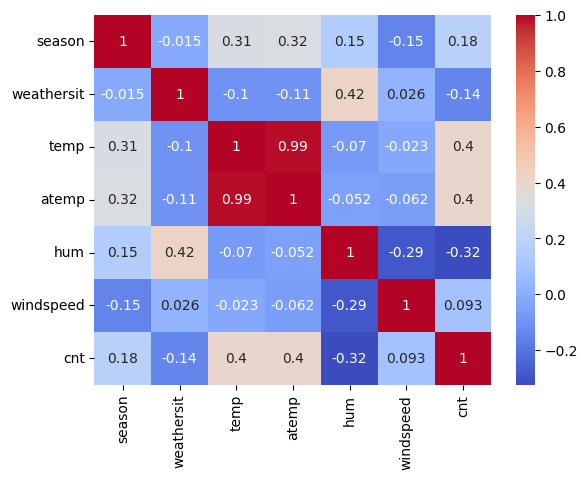

In [40]:
# creating heatmap to know the correlation between columns
weather_cols = hour_df[['season', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
sns.heatmap(weather_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

Heatmap tersebut menampilkan kekuatan korelasi antara kolom-kolom yang merepresentasikan kondisi cuaca dengan jumlah rental sepeda. Namun, terlihat bahwa secara keseluruhan, masing-masing kolom tidak ada yang berkorelasi sangat kuat dengan jumlah rental sepeda.  

In [41]:
hour_df.groupby(by=["season"]).agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})

,casual,registered,cnt
season,,,
1,14.290901,96.823668,111.114569
2,46.160581,162.183488,208.344069
3,50.287144,185.729093,236.016237
4,30.666824,168.202032,198.868856


Musim spring (1) merupakan musim dengan rata-rata jumlah user (baik yang casual maupun registered) tersedikit dibandingkan dengan musim lainnya. Jumlah rental sepedanya pun jauh lebih rendah dibandingkan dengan musim lainnya. Sebaliknya, musim fall (3) menjadi musim dengan rata-rata jumlah user dan rental sepeda tertinggi. Dengan jumlah rental sepeda 2x lebih tinggi dibandingkan musim spring.

In [42]:
hour_df.groupby(by="weathersit").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})

,casual,registered,cnt
weathersit,,,
1,40.545431,164.323841,204.869272
2,29.595290,145.570202,175.165493
3,16.055673,95.523608,111.579281
4,2.666667,71.666667,74.333333


Jumlah user dan rental sepeda paling sedikit saat cuacanya sedang hujan besar dan semacamnya. Perbedaannya sangat jauh dibandingkan saat cuaca cerah, dimana jumlahnya hampir 3x lipatnya. Hal ini sangat dapat dipahami karena bepergian menggunakan sepeda saat hujan badai tentu tidak aman dan sebaliknya akan sangat aman saat cuaca cerah.

In [43]:
hour_df.groupby(by="holiday").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})

,casual,registered,cnt
holiday,,,
0,35.408377,155.020203,190.42858
1,44.718000,112.152000,156.87000


Perbedaan jumlah user dan rental sepeda antara hari libur atau tidak, tidak begitu jauh. Namun, jumlahnya masih lebih tinggi saat tidak libur. Hal ini dapat dipahami karena pengguna rental sepeda mungkin cenderung dimanfaatkan untuk pergi bekerja, sekolah, dan lain-lain.

In [44]:
hour_df.groupby(by="workingday").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})

,casual,registered,cnt
workingday,,,
0,57.441422,123.963910,181.405332
1,25.561315,167.646439,193.207754


Perbedaan jumlah user dan rental sepeda antara hari kerja atau tidak, tidak begitu jauh. Namun, jumlahnya masih lebih tinggi saat hari kerja. Hal ini dapat dipahami karena pengguna rental sepeda mungkin cenderung dimanfaatkan untuk pergi bekerja, sekolah, dan lain-lain.

In [45]:
hour_df.groupby(by="weekday").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})

,casual,registered,cnt
weekday,,,
0,56.163469,121.305356,177.468825
1,28.553449,155.191206,183.744655
2,23.580514,167.658377,191.238891
3,23.159192,167.971313,191.130505
4,24.872521,171.564144,196.436665
5,31.458786,164.677121,196.135907
6,61.246815,128.962978,190.209793


Distribusi rata-rata jumlah rental sepeda setiap harinya cenderung sama dan tidak ada perbedaan yang signifikan.



In [46]:
hour_df.groupby(by="hr").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})

,casual,registered,cnt
hr,,,
0,10.158402,43.739669,53.898072
1,6.504144,26.871547,33.375691
2,4.772028,18.097902,22.869930
3,2.715925,9.011478,11.727403
4,1.253945,5.098996,6.352941
5,1.411437,18.478382,19.889819
6,4.161379,71.882759,76.044138
7,11.055021,201.009629,212.064649
8,21.679505,337.331499,359.011004


Distribusi rata-rata jumlah rental per jamnya cenderung tinggi di waktu siang ke sore hari.

## Visualization & Explanatory Analysis

Tahap memvisualisasikan data dan menjelaskan insight yang diperoleh

In [47]:
# labelling
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_labels = {1: 'Clear/Few clouds', 2: 'Mist/Cloudy', 3: 'Light Precip', 4: 'Heavy Precip'}

weekday_labels = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 0: 'Sun'}
workingday_labels = {0: 'Non working day', 1: 'Working day'}
holiday_labels = {0: 'Non holiday', 1: 'Holiday'}

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap performa rental sepeda? Saat cuaca apa yang jumlah rata-rata rentalnya paling tinggi?

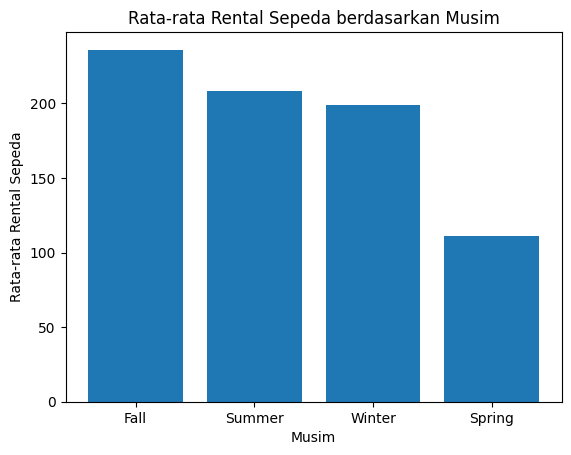

In [48]:
rentals_by_season = hour_df.groupby('season')['cnt'].mean()
rentals_by_season.index = rentals_by_season.index.map(season_labels)
rentals_by_season = rentals_by_season.sort_values(ascending=False)

plt.xlabel('Musim')
plt.ylabel('Rata-rata Rental Sepeda')
plt.title('Rata-rata Rental Sepeda berdasarkan Musim')

plt.bar(rentals_by_season.index, rentals_by_season.values)
plt.ticklabel_format(style='plain', axis='y')

Rental sepeda paling banyak disewa secara berurutan pada saat musim fall, summer, winter, dan spring. Terdapat perbedaan yang cukup signifikan pada jumlah rental sepeda di spring. Hal ini mungkin dipengaruhi oleh kondisi udara dan cuaca sekitar pada saat musim tersebut.

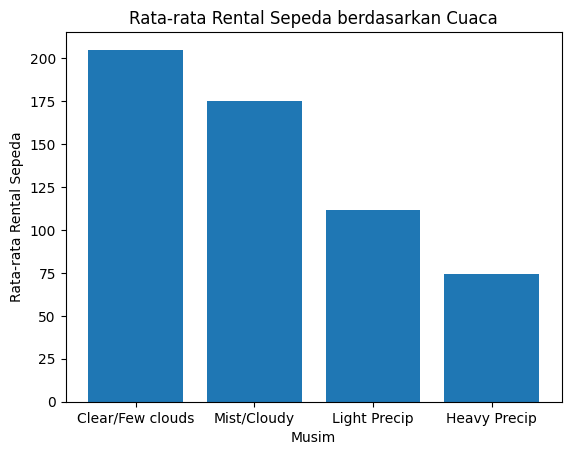

In [49]:
rentals_by_weather = hour_df.groupby('weathersit')['cnt'].mean()
rentals_by_weather.index = rentals_by_weather.index.map(weather_labels)
rentals_by_weather = rentals_by_weather.sort_values(ascending=False)

plt.xlabel('Musim')
plt.ylabel('Rata-rata Rental Sepeda')
plt.title('Rata-rata Rental Sepeda berdasarkan Cuaca')

plt.bar(rentals_by_weather.index, rentals_by_weather.values)
plt.ticklabel_format(style='plain', axis='y')

Rental sepeda paling banyak disewa saat cuacanya cerah sehingga kondisinya mendukung untuk orang-orang bersepeda. Dari pola bar chart di atas, terlihat bahwa semakin tinggi potensi hujan (presipitasi), maka orang-orang semakin enggan dalam menyewa sepeda. Hal ini disebabkan oleh cuaca yang tidak mendukung untuk bersepeda saat hujan/badai.

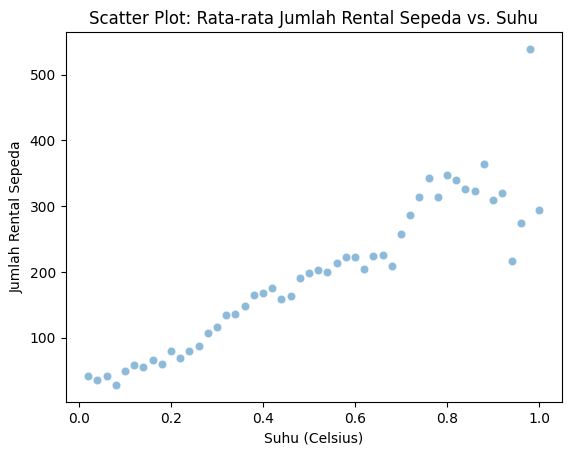

In [50]:
avg_rent_by_temp = hour_df.groupby(by='temp')['cnt'].mean().reset_index()

sns.scatterplot(data=avg_rent_by_temp, x='temp', y='cnt', alpha=0.5)

plt.title('Scatter Plot: Rata-rata Jumlah Rental Sepeda vs. Suhu')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Rental Sepeda')
plt.show()

Terlihat bahwa semakin rendah suhunya (dingin) maka jumlah rental sepedanya semakin sedikit. Namun, juga terdapat penurunan tren saat suhunya terlalu tinggi. Hal ini mengindikasikan bahwa suhu di sekitar 0.8 celcius (setelah dinormalisasi) menjadi rentang suhu yang paling diminati warga untuk menyewa sepeda.

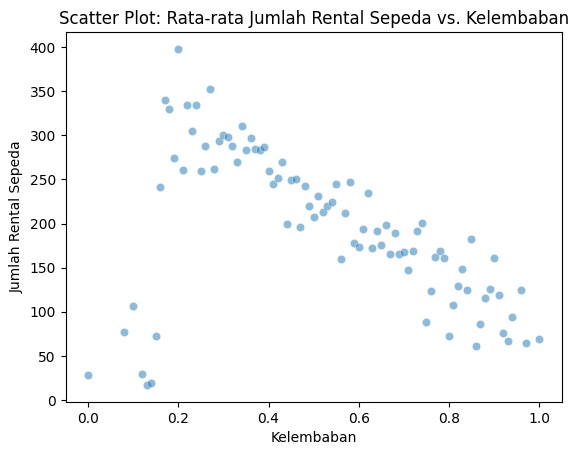

In [51]:
avg_rent_by_hum = hour_df.groupby(by='hum')['cnt'].mean().reset_index()

sns.scatterplot(data=avg_rent_by_hum, x='hum', y='cnt', alpha=0.5)

plt.title('Scatter Plot: Rata-rata Jumlah Rental Sepeda vs. Kelembaban')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Rental Sepeda')
plt.show()

Terlihat bahwa semakin tinggi kelembaban maka jumlah rental sepedanya semakin sedikit. Hal ini mengindikasikan bahwa penggunaan sepeda mungkin lebih cenderung disukai saat udaranya bersifat medium, tidak terlalu kering dan tidak terlalu lembab.

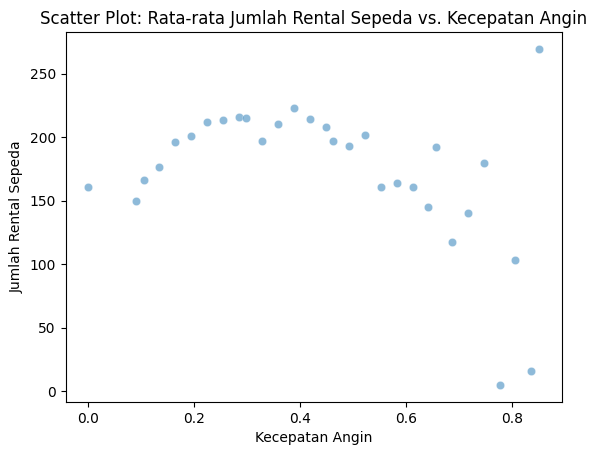

In [52]:
avg_rent_by_windspeed = hour_df.groupby(by='windspeed')['cnt'].mean().reset_index()

sns.scatterplot(data=avg_rent_by_windspeed, x='windspeed', y='cnt', alpha=0.5)

plt.title('Scatter Plot: Rata-rata Jumlah Rental Sepeda vs. Kecepatan Angin')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Rental Sepeda')
plt.show()

Terlihat bahwa kecepatan angin tidak begitu mempengaruhi penggunaan rental sepeda. Namun, kecepatan angin yang sangat tinggi membuat jumlah rental sepeda menjadi sangat sedikit. Hal ini mungkin dipengaruhi oleh tingkat kemanan yang juga semakin rendah dalam bersepeda saat kondisi angin bertiup kencang. Namun, masih dipengaruhi oleh banyak faktor lain juga.

### Pertanyaan 2: Bagaimana perbandingan performa rental sepeda pada hari kerja dengan hari libur? Hari apa dan pukul berapa yang paling tinggi?

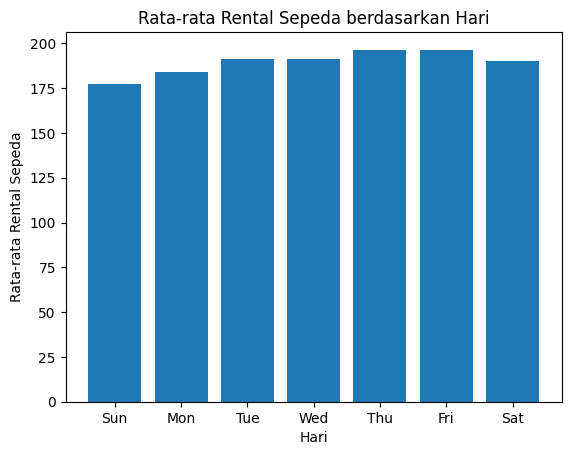

In [53]:
rentals_by_day = hour_df.groupby('weekday')['cnt'].mean()
rentals_by_day.index = rentals_by_day.index.map(weekday_labels)

plt.xlabel('Hari')
plt.ylabel('Rata-rata Rental Sepeda')
plt.title('Rata-rata Rental Sepeda berdasarkan Hari')

plt.bar(rentals_by_day.index, rentals_by_day.values)
plt.ticklabel_format(style='plain', axis='y')

Tidak ada perbedaan jumlah rental sepeda yang signifikan antar harinya. Hal ini mengindikasikan bahwa hari apa pun itu tidak begitu mempengaruhi keputusan orang dalam menyewa sepeda.

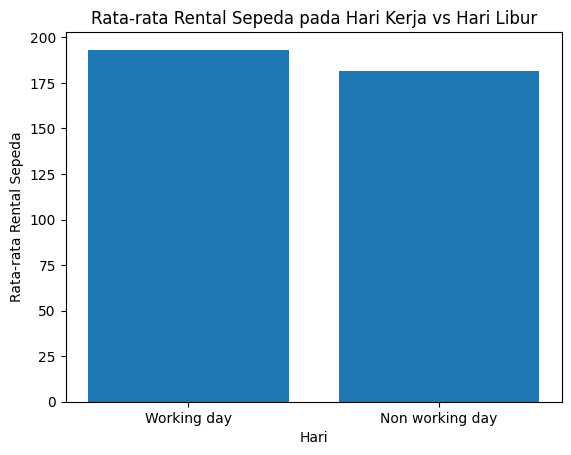

In [54]:
rentals_by_workingday = hour_df.groupby('workingday')['cnt'].mean()
rentals_by_workingday.index = rentals_by_workingday.index.map(workingday_labels)
rentals_by_workingday = rentals_by_workingday.sort_values(ascending=False)

plt.xlabel('Hari')
plt.ylabel('Rata-rata Rental Sepeda')
plt.title('Rata-rata Rental Sepeda pada Hari Kerja vs Hari Libur')

plt.bar(rentals_by_workingday.index, rentals_by_workingday.values)
plt.ticklabel_format(style='plain', axis='y')

Tidak ada perbedaan yang signifikan pada jumlah user dan rental sepeda antara hari kerja atau tidak. Namun, jumlahnya masih lebih tinggi saat hari kerja. Hal ini dapat dipahami karena penggunaan rental sepeda mungkin cenderung dimanfaatkan untuk pergi bekerja, sekolah, dll.

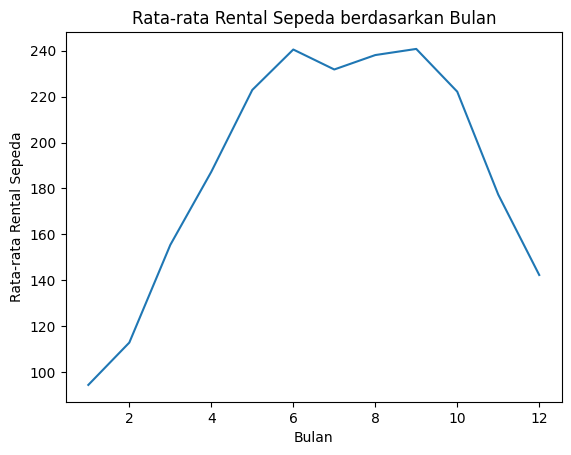

In [55]:
rentals_by_mnth = hour_df.groupby('mnth')['cnt'].mean()

plt.xlabel('Bulan')
plt.ylabel('Rata-rata Rental Sepeda')
plt.title('Rata-rata Rental Sepeda berdasarkan Bulan')

plt.plot(rentals_by_mnth.index, rentals_by_mnth.values)
plt.ticklabel_format(style='plain', axis='y')

Penggunaan rental sepeda paling tinggi di rentang bulan Mei hingga Oktober. Hal ini sesuai dengan distribusi jumlah rental sepeda berdasarkan musim. Dimana bulan Mei hingga Oktober merupakan masa-masa summer hingga fall yang mana cuacanya cenderung bagus dan cerah.

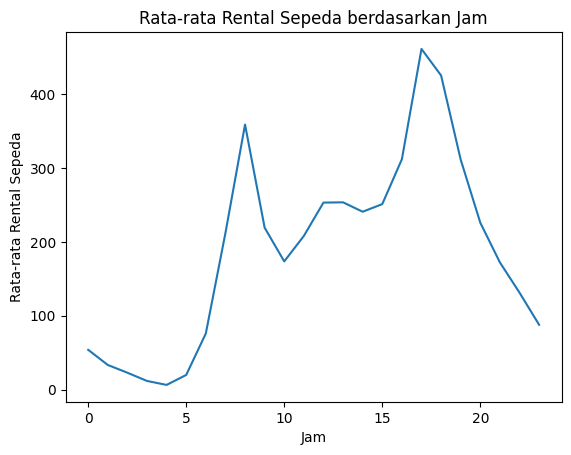

In [56]:
rentals_by_hour = hour_df.groupby('hr')['cnt'].mean()

plt.xlabel('Jam')
plt.ylabel('Rata-rata Rental Sepeda')
plt.title('Rata-rata Rental Sepeda berdasarkan Jam')

plt.plot(rentals_by_hour.index, rentals_by_hour.values)
plt.ticklabel_format(style='plain', axis='y')

Penggunaan rental sepeda paling tinggi di rentang jam 17-18. Jumlah penggunaan mulai meningkat di jam 8 yang merupakan saat orang berangkat beraktivitas. Lalu menurun lagi dan kembali meningkat saat jam pulang kerja seperti jam 17 dan 18. Lalu semakin malam akan semakin menurun kembali.

In [57]:
hour_df.to_csv("all_df.csv", index=False)

## Conclusion

- Conclution pertanyaan 1 : Kondisi cuaca cukup mempengaruhi jumlah rental sepeda. Musim dan cuaca yang cerah mendukung orang-orang untuk bersepeda sehingga angka rental sepedanya tinggi. Sebaliknya, cuaca buruk, seperti hujan besar dan badai salju akan membuat angka rental sepeda sangat kecil karena cuacanya yang tidak mendukung untuk bersepeda.
- Conclution pertanyaan 2 : Perbedaan hari dalam seminggu tidak begitu berpengaruh terhadap angka rental sepeda. Begitu juga dengan hari libur atau hari kerja, keduanya sama-sama memiliki angka rental sepeda yang cukup setara. Namun, jam cukup berpengaruh pada jumlah rental sepeda. Jumlah rental sepeda sangat sedikit di saat dini hari (sebelum jam 6 pagi). Rental sepeda paling banyak digunakan pada siang hingga sore hari.